----
## **<font color="crimson"> Ya está ok</font>**

In [1]:
pip install xarray

  Using cached xarray-2025.4.0-py3-none-any.whl.metadata (12 kB)
Using cached xarray-2025.4.0-py3-none-any.whl (1.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install toolz

  Using cached toolz-1.0.0-py3-none-any.whl.metadata (5.1 kB)
Using cached toolz-1.0.0-py3-none-any.whl (56 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install netcdf4

  Using cached cftime-1.6.4.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.7 kB)
Using cached cftime-1.6.4.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cartopy

  Using cached Cartopy-0.24.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.9 kB)
  Using cached pyshp-2.3.1-py2.py3-none-any.whl.metadata (55 kB)
Using cached Cartopy-0.24.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
Using cached pyshp-2.3.1-py2.py3-none-any.whl (46 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install h5netcdf 

  Using cached h5netcdf-1.6.1-py3-none-any.whl.metadata (13 kB)
  Using cached h5py-3.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.5 kB)
Using cached h5netcdf-1.6.1-py3-none-any.whl (49 kB)
Using cached h5py-3.13.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install cfgrib

  Using cached cfgrib-0.9.15.0-py3-none-any.whl.metadata (55 kB)
  Using cached eccodes-2.41.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (14 kB)
  Using cached findlibs-0.1.1-py3-none-any.whl.metadata (3.6 kB)
Using cached cfgrib-0.9.15.0-py3-none-any.whl (48 kB)
Using cached eccodes-2.41.0-cp311-cp311-manylinux_2_28_x86_64.whl (7.4 MB)
Using cached findlibs-0.1.1-py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cftime
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### **<font color="Purple"> Datos de HadGEM3 </font>**

##### **<font color="olive"> Geopotencial </font>**

In [9]:
gph_file = 'datasetsok/zg500_AERday_HadGEM3-GC31-LL_historical_r1i1p1f3_gn_19790101-20141230.nc'

In [10]:
gph_ds19=xr.open_dataset(gph_file)
gphds19 = gph_ds19['zg500']
# gphds19

In [11]:
anomaliaszg500 = 'datasetsok/anomalias_day_zgHG.nc'
anomaliaszg500=xr.open_dataset(anomaliaszg500)
anomaliaszg500 = anomaliaszg500['zg500']
anomaliaszg500["time"] = anomaliaszg500.time.dt.floor("D")

In [12]:
gphds19 = gphds19.sel(lat=slice(15,60),lon=slice(180,290)) #coords son 0-360°, necesito 70W-180W
# gphds19

In [13]:
gph_climday = gphds19.groupby('time.dayofyear').mean(dim='time')

In [14]:
gphclimdaysuav = gph_climday.rolling(dayofyear=14, center=True, min_periods=1).mean()

In [15]:
anomaliasday = gphds19.groupby('time.dayofyear') - gphclimdaysuav

In [16]:
anomaliasday["time"] = anomaliasday.time.dt.floor("D")

In [17]:
gph_std = gphds19.std(dim='time')

In [18]:
norm = anomaliasday/gph_std

<div align="center">

##### <font color="darkpink"> ESTE CALCULA EL ÍNDICE </font>

</div>


<div align="center">

##### <font color="darkorange"> PNA = Z * (15°N-25°N, 180-140°W) - Z * (40°N-50°N, 180-140°W) + Z * (45°N-60°N, 125°W-105°W) - Z * (25°N-35°N, 90°W-70°W) </font>

</div>


In [19]:
PNA_1 = norm.sel(lat=slice(15,25),lon=slice(180,220))
PNA_2 = norm.sel(lat=slice(40,50),lon=slice(180,220))
PNA_3 = norm.sel(lat=slice(45,60),lon=slice(235,255))
PNA_4 = norm.sel(lat=slice(25,35),lon=slice(270,290))

In [20]:
weights = np.cos(np.deg2rad(norm.lat))
weights.name = "weights"

PNA1_weighted = PNA_1.weighted(weights)
PNA1 = PNA1_weighted.mean(dim=["lon", "lat"])

PNA2_weighted = PNA_2.weighted(weights)
PNA2 = PNA2_weighted.mean(dim=["lon", "lat"])

PNA3_weighted = PNA_3.weighted(weights)
PNA3 = PNA3_weighted.mean(dim=["lon", "lat"])

PNA4_weighted = PNA_4.weighted(weights)
PNA4 = PNA4_weighted.mean(dim=["lon", "lat"])

In [21]:
PNAidxHG = PNA1 - PNA2 + PNA3 - PNA4

In [22]:
PNAidxHG_smooth=PNAidxHG.rolling(time=7).mean()

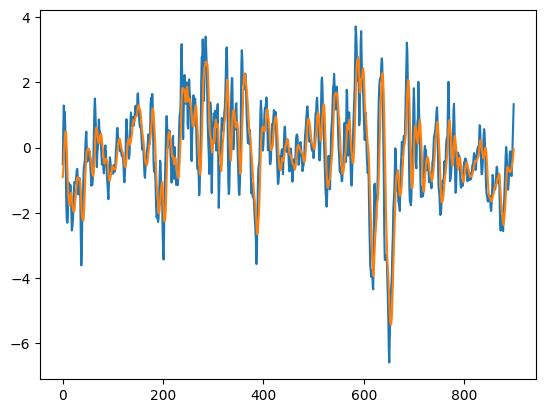

In [23]:
plt.plot(PNAidxHG.isel(time=np.arange(100,1000)))
plt.plot(PNAidxHG_smooth.isel(time=np.arange(100,1000)))

In [24]:
def idxPNAHG_std2(PNAidxHG_smooth):
    """
    Segmenta el índice PNAidxHG_smooth en tres categorías, usando la desviación estándar como umbral:
    - PNApHG: Fechas donde los valores son mayores a +1*std.
    - PNAnHG: Fechas donde los valores son menores a -1*std.
    - PNA0HG: Fechas donde los valores están entre -1*std y +1*std.

    Devuelve un diccionario con las fechas correspondientes.
    """
    std2 = PNAidxHG_smooth.std(dim='time')/2 # Calcula la desviación estándar del índice
    PNApHG = PNAidxHG_smooth.time[PNAidxHG_smooth >= std2]
    PNAnHG = PNAidxHG_smooth.time[PNAidxHG_smooth <= -std2]
    PNA0HG = PNAidxHG_smooth.time[(PNAidxHG_smooth > -std2) & (PNAidxHG_smooth < std2)]

    return {'PNApHG': PNApHG, 'PNAnHG': PNAnHG, 'PNA0HG': PNA0HG}


In [25]:
PNAidxHGstd = idxPNAHG_std2(PNAidxHG_smooth)

In [26]:
# #esta solo me dice cuando el indice es positivo, negativo, neutro
# def idxPNAHG(PNAidxHG_smooth):
#     """
#     Segmenta el índice PNAidxHG_smooth en tres categorías:
#     - PNApHG: Fechas donde los valores son mayores a 1.
#     - PNAnHG: Fechas donde los valores son menores a -1.
#     - PNA0HG: Fechas donde los valores están entre -1 y 1.

#     Devuelve un diccionario con las fechas correspondientes.
#     """
#     # Filtrar los índices de tiempo donde se cumple la condición
#     PNApHG = PNAidxHG_smooth.time[PNAidxHG_smooth >= 1]#.values
#     PNAnHG = PNAidxHG_smooth.time[PNAidxHG_smooth <= -1]#.values
#     PNA0HG = PNAidxHG_smooth.time[(PNAidxHG_smooth > -0.5) & (PNAidxHG_smooth < 0.5)]#.values

#     return {'PNApHG': PNApHG, 'PNAnHG': PNAnHG, 'PNA0HG': PNA0HG}


In [27]:
# PNAidxHG = idxPNAHG (PNAidxHG_smooth)

##### **<font color="olive"> Rutas de idx con zg500 </font>**

In [28]:
PNAp_fechas =  PNAidxHGstd['PNApHG']
PNAn_fechas = PNAidxHGstd['PNAnHG']
PNA0_fechas = PNAidxHGstd['PNA0HG']

In [29]:
gph_filtradop = anomaliaszg500.sel(time=anomaliaszg500.time.isin(PNAp_fechas.values))
gph_filtradon = anomaliaszg500.sel(time=anomaliaszg500.time.isin(PNAn_fechas.values))
gph_filtrado0 = anomaliaszg500.sel(time=anomaliaszg500.time.isin(PNA0_fechas.values))

In [30]:
gph_filtradop.to_netcdf('datasetsok/zg500_idx_std+.nc')
gph_filtradon.to_netcdf('datasetsok/zg500_idx_std-.nc')
gph_filtrado0.to_netcdf('datasetsok/zg500_idx_std0.nc')

##### **<font color="olive"> Concat de índice >1 y valores de gph </font>**

In [31]:
# esta es la base que tiene solo las fechas cuando el índice > 1
# es también las anomalías del ciclo anual 

In [32]:
idxp_gph_file = 'datasetsok/zg500_idx_std+.nc' 

In [33]:
idxp_gph_ds = xr.open_dataset(idxp_gph_file)
idxp_gph = idxp_gph_ds['zg500']
# idxp_gph 

In [34]:
idxp_gph_vals = idxp_gph.mean(dim='time')
idxp_gph_seasons = idxp_gph.groupby(idxp_gph.time.dt.season).mean(dim='time') #DJF
idxp_gph_djf = idxp_gph_seasons.sel(season='DJF')

##### **<font color="olive"> Concat de índice <-1 y valores de gph </font>**

In [35]:
idxn_gph_file = 'datasetsok/zg500_idx_std-.nc' 

In [36]:
idxn_gph_ds = xr.open_dataset(idxn_gph_file)
idxn_gph = idxn_gph_ds['zg500'] 

In [37]:
idxn_gph_vals = idxn_gph.mean(dim='time')
idxn_gph_seasons = idxn_gph.groupby(idxn_gph.time.dt.season).mean(dim='time') #DJF
idxn_gph_djf = idxn_gph_seasons.sel(season='DJF')

##### **<font color="olive"> Concat de índice <-0.5,>0.5 y valores de gph </font>**

In [38]:
idx0_gph_file = 'datasetsok/zg500_idx_std0.nc'

In [39]:
idx0_gph_ds = xr.open_dataset(idx0_gph_file)
idx0_gph = idx0_gph_ds['zg500'] 

In [40]:
idx0_gph_vals = idx0_gph.mean(dim='time')
idx0_gph_seasons = idx0_gph.groupby(idx0_gph.time.dt.season).mean(dim='time') #DJF
idx0_gph_djf = idx0_gph_seasons.sel(season='DJF')

Text(0.5, 1.0, 'Anomalías de gph cuando índice <-std \n HadGEM3 DJF(1979-2019)')

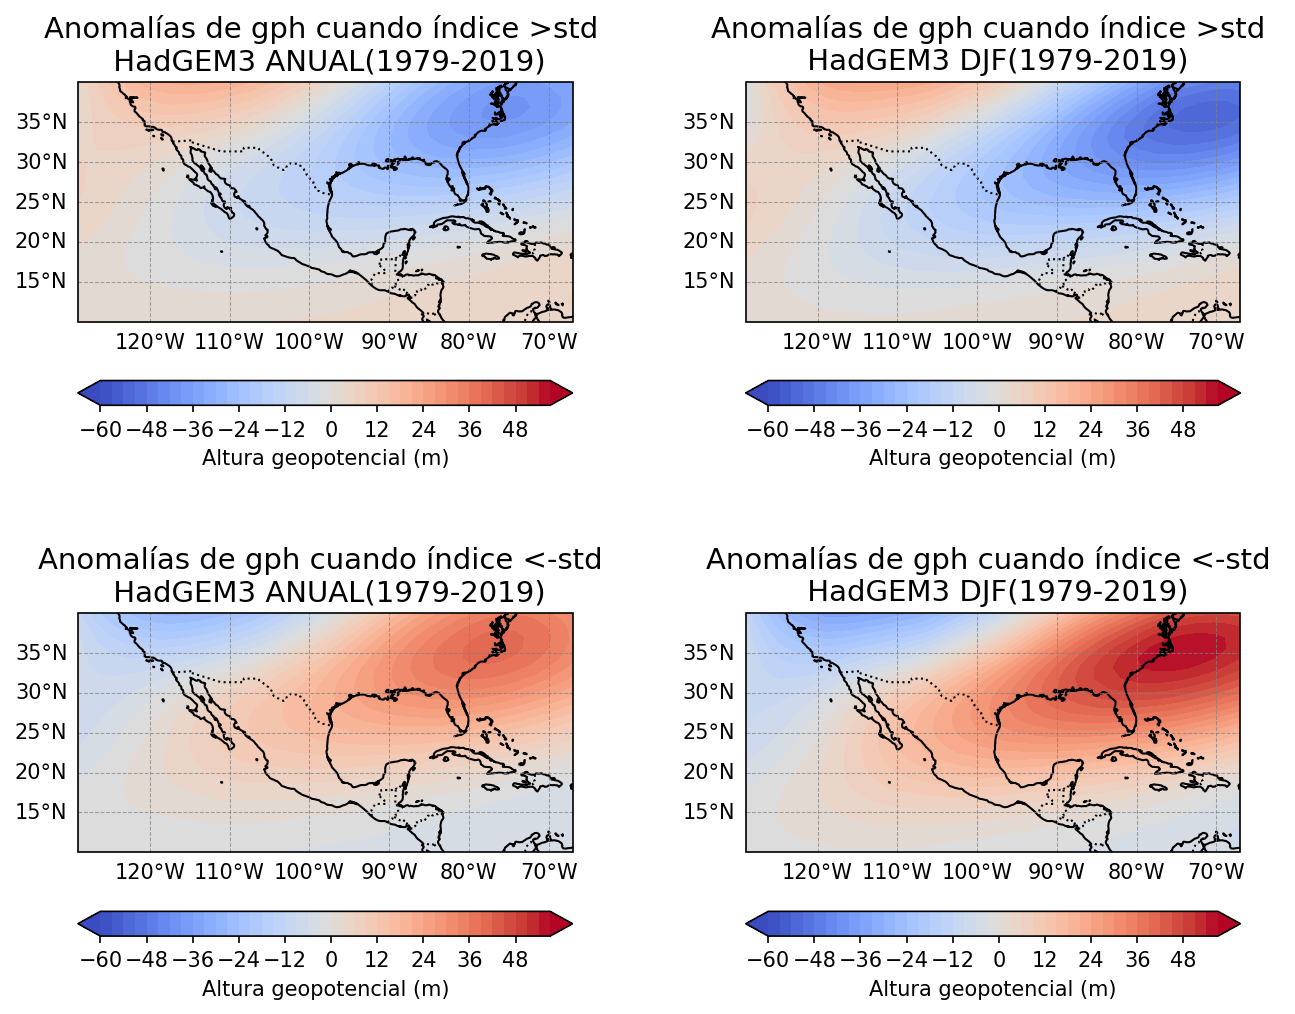

In [41]:
plt.figure(figsize=(10, 8), dpi=150)
plt.subplots_adjust(wspace=0.35,hspace=0.35)

# ------------------------ANUAL ÍNDICE POSITIVO
ax = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax.coastlines()
cs=ax.contourf(idxp_gph_vals.lon,idxp_gph_vals.lat,idxp_gph_vals,levels=np.arange(-60,60,3),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1,ax=ax)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice >std \n HadGEM3 ANUAL(1979-2019)',fontsize=14)


# ------------------------DJF INDICE POSITIVO 
ax = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax.coastlines()
cs=ax.contourf(idxp_gph_djf.lon,idxp_gph_djf.lat,idxp_gph_djf,levels=np.arange(-60,60,3),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1,ax=ax)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice >std \n HadGEM3 DJF(1979-2019)',fontsize=14)
# plt.tight_layout(h_pad=2,pad=1)

# ------------------------ANUAL INDICE NEGATIVO 
ax1 = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax1.coastlines()
cs=ax1.contourf(idxn_gph_vals.lon,idxn_gph_vals.lat,idxn_gph_vals,levels=np.arange(-60,60,3),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax1.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax1.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice <-std \n HadGEM3 ANUAL(1979-2019)',fontsize=14)
# plt.tight_layout(h_pad=2,pad=1)

# ------------------------DJF INDICE NEGATIVO
ax1 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax1.coastlines()
cs=ax1.contourf(idxn_gph_djf.lon,idxn_gph_djf.lat,idxn_gph_djf,levels=np.arange(-60,60,3),cmap='coolwarm',extend='both',transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax1.set_extent([231,293, 10,40], crs=ccrs.PlateCarree())
gl=ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax1.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice <-std \n HadGEM3 DJF(1979-2019)',fontsize=14)


In [42]:
# anomaliasday ESTE SE MAPEA

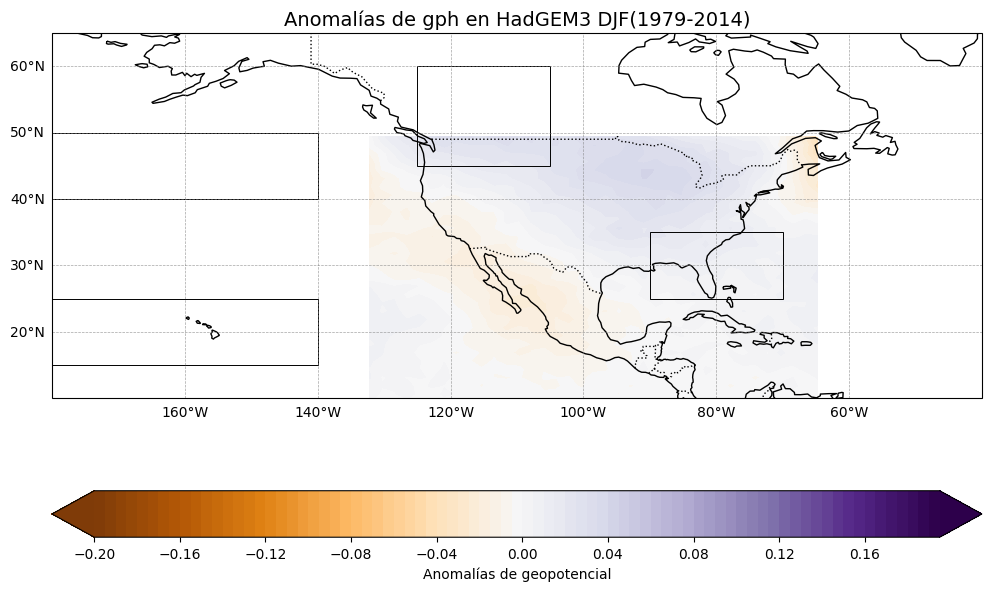

In [47]:
from matplotlib.patches import Rectangle

# Crear la figura y el eje con proyección
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)
ax1.set_extent([-180, -40, 10, 65], crs=ccrs.PlateCarree())

gl = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, 
                   color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False

# Dibujar las anomalías de altura geopotencial
cs = ax1.contourf(anomaliaszg500.lon, anomaliaszg500.lat, anomaliaszg500,
                  levels=np.arange(-0.2, 0.2, 0.005), cmap='PuOr', extend='both',
                  transform=ccrs.PlateCarree())

cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Anomalías de geopotencial', fontsize=10)

rects = [
    {'lat': (15, 25), 'lon': (180, 220)},
    {'lat': (40, 50), 'lon': (180, 220)},
    {'lat': (45, 60), 'lon': (235, 255)},
    {'lat': (25, 35), 'lon': (270, 290)}
]
for rect in rects:
    lon_min, lon_max = rect['lon']
    lat_min, lat_max = rect['lat']
    ax1.add_patch(Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
                             linewidth=0.7, edgecolor='black', facecolor='none',
                             transform=ccrs.PlateCarree()))
plt.title('Anomalías de gph en HadGEM3 DJF(1979-2014)', fontsize=14)
plt.show()

In [48]:
anomaliaszg500 = anomaliaszg500.mean(dim='time')

ValueError: 'time' not found in array dimensions ('lat', 'lon')

TypeError: Input z must be 2D, not 3D

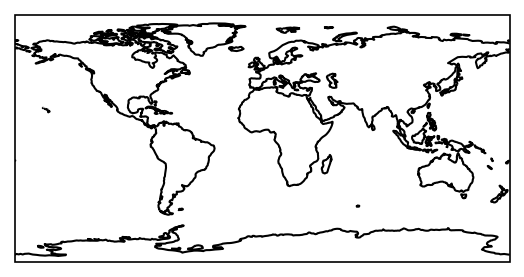

In [113]:
plt.figure(figsize=(10, 8), dpi=150)
plt.subplots_adjust(wspace=0.35,hspace=0.35)

# ------------------------ANUAL 
ax = plt.subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax.coastlines()
cs=ax.contourf(anomaliaszg500.lon,anomaliaszg500.lat,anomaliaszg500,levels=np.arange(-1,1,.05),cmap='PuOr',extend='both',transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([-180, -40, 10, 65], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1,ax=ax)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
# rects = [
#     {'lat': (15, 25), 'lon': (180, 220)},
#     {'lat': (40, 50), 'lon': (180, 220)},
#     {'lat': (45, 60), 'lon': (235, 255)},
#     {'lat': (25, 35), 'lon': (270, 290)}
# ]
# for rect in rects:
#     lon_min, lon_max = rect['lon']
#     lat_min, lat_max = rect['lat']
#     ax.add_patch(Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
#                              linewidth=0.7, edgecolor='black', facecolor='none',
#                              transform=ccrs.PlateCarree()))
plt.title('Anomalías de gph anual \n HadGEM3 ANUAL(1979-2014)',fontsize=14)


# ------------------------ANUAL cercano a 0 
ax = plt.subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax.coastlines()
cs=ax.contourf(idx0_gph_vals.lon,idx0_gph_vals.lat,idx0_gph_vals,levels=np.arange(-10,10,2),cmap='PuOr',extend='both',transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([-180, -40, 10, 65], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1,ax=ax)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
# rects = [
#     {'lat': (15, 25), 'lon': (180, 220)},
#     {'lat': (40, 50), 'lon': (180, 220)},
#     {'lat': (45, 60), 'lon': (235, 255)},
#     {'lat': (25, 35), 'lon': (270, 290)}
# ]
# for rect in rects:
#     lon_min, lon_max = rect['lon']
#     lat_min, lat_max = rect['lat']
#     ax.add_patch(Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
#                              linewidth=0.7, edgecolor='black', facecolor='none',
#                              transform=ccrs.PlateCarree()))
plt.title('Anomalías de gph cuando índice >-0.5 y <0.5 \n HadGEM3 anual(1979-2014)',fontsize=14)

# ------------------------ANUAL INDICE POSITIVO
ax = plt.subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax.coastlines()
cs=ax.contourf(idxp_gph_vals.lon,idxp_gph_vals.lat,idxp_gph_vals,levels=np.arange(-60,60,3),cmap='PuOr',extend='both',transform=ccrs.PlateCarree())
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.set_extent([-180, -40, 10, 65], crs=ccrs.PlateCarree())
gl=ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1,ax=ax)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
plt.title('Anomalías de gph cuando índice >1 \n HadGEM3 ANUAL(1979-2019)',fontsize=14)

# rects = [
#     {'lat': (15, 25), 'lon': (180, 220)},
#     {'lat': (40, 50), 'lon': (180, 220)},
#     {'lat': (45, 60), 'lon': (235, 255)},
#     {'lat': (25, 35), 'lon': (270, 290)}
# ]
# for rect in rects:
#     lon_min, lon_max = rect['lon']
#     lat_min, lat_max = rect['lat']
#     ax.add_patch(Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
#                              linewidth=0.7, edgecolor='black', facecolor='none',
#                              transform=ccrs.PlateCarree()))
plt.title('Anomalías de gph cuando índice <-1 \n HadGEM3 anual(1979-2014)',fontsize=14)

# ------------------------ANUAL INDICE negativo
ax1 = plt.subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax1.coastlines()
cs=ax1.contourf(idxn_gph_vals.lon,idxn_gph_vals.lat,idxn_gph_vals,levels=np.arange(-60,60,3),cmap='PuOr',extend='both',transform=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax1.set_extent([-180, -40, 10, 65], crs=ccrs.PlateCarree())
gl=ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False,color='gray', alpha=0.7, linestyle='--',linewidth=0.5)
ax1.xlabels_top = False
gl.top_labels = gl.right_labels = False
plt.minorticks_on()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.1, ax=ax1)
cbar.ax.set_xlabel('Altura geopotencial (m)', fontsize=10)
# rects = [
#     {'lat': (15, 25), 'lon': (180, 220)},
#     {'lat': (40, 50), 'lon': (180, 220)},
#     {'lat': (45, 60), 'lon': (235, 255)},
#     {'lat': (25, 35), 'lon': (270, 290)}
# ]
# for rect in rects:
#     lon_min, lon_max = rect['lon']
#     lat_min, lat_max = rect['lat']
#     ax1.add_patch(Rectangle((lon_min, lat_min), lon_max - lon_min, lat_max - lat_min,
#                              linewidth=0.7, edgecolor='black', facecolor='none',
#                              transform=ccrs.PlateCarree()))
plt.title('Anomalías de gph cuando índice <-1 \n HadGEM3 ANUAL(1979-2014)',fontsize=14)
